<a href="https://colab.research.google.com/github/IlfGauhnith/TAIA/blob/main/DecayingEpsilonGreedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Configurações Iniciais

Para instalar e importar pacotes e configurar algumas coisas...

In [83]:
from IPython.display import clear_output
import sys
import numpy as np
import matplotlib.pyplot as plt
import math

if 'google.colab' in sys.modules:
    # clone repository, to use "util" module
    !git clone https://github.com/pablo-sampaio/rl_facil
    sys.path.append("/content/rl_facil")
    clear_output()
else:
    from os import path
    sys.path.append( path.dirname( path.dirname( path.abspath("__main__") ) ) )

In [103]:
from util.bandit_envs import MultiArmedBanditEnv, GaussianMultiArmedBanditEnv
from util.experiments import repeated_exec
from util.plot import plot_multiple_results
from cap02.baseline_algorithms import run_random
from cap02.epsilon_greedy import run_epsilon_greedy

In [85]:
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]
env = MultiArmedBanditEnv(BANDIT_PROBABILITIES)

BANDIT_MEANS = [0.4, 0.5, 0.55]
env_gauss = GaussianMultiArmedBanditEnv(BANDIT_MEANS)

STEPS = 10000
RUNS  = 75

## Definições iniciais
Implementação do algoritmo Epsilon Greedy e do cálculo de média de recompensas.

In [86]:
def calculate_mean(current_mean, n_action, reward):
  delta = reward - current_mean
  return (1/n_action) * delta

In [87]:
"""
env: Multiarmed bandits enviroment
total_steps: Total de ações
totally_decayed_target_step: Passo limite para o decaimento no epsilon, ao chegar nesse passo epsilon será igual ao mínimo
decay_function: Função de decaimento da taxa epsilon
"""

def run_decaying_epsilon_greedy(env, total_steps, totally_decayed_target_step, decay_function, initial_epsilon=1, min_epsilon=0, plateau_at_min=True):
  num_actions = env.get_num_actions()

  reward_mean = [0.0 for i in range(num_actions)] # Média das recompensas da ação i.
  action_counter = [0 for i in range(num_actions)] # Quantidade de vezes que ação i foi executada.
  reward_per_step = []

  env.reset()

  for i in range(total_steps):
    epsilon = decay_function(min_epsilon, i, totally_decayed_target_step, initial_epsilon, plateau_at_min)


    if (np.random.random() <= epsilon): # Caiu na probabilidade epsilon, executa uma explore action
      action = np.random.randint(num_actions) # Explore

    else: # Caiu na probabilidade de exploit action
      action = np.argmax(reward_mean)  # Exploit

    reward = env.step(action)
    reward_per_step.append(reward)
    action_counter[action] += 1

    reward_mean[action] += calculate_mean(reward_mean[action], action_counter[action], reward)

  return reward_per_step, reward_mean

## Linear Decay

In [88]:
def linear_decay(min_epsilon, current_step, target_step, initial_epsilon=1, plateau_at_min=True):
  decay_rate = (initial_epsilon - min_epsilon) / target_step

  epsilon = initial_epsilon - (decay_rate * current_step)

  if plateau_at_min and current_step > target_step:
    return min_epsilon

  return epsilon

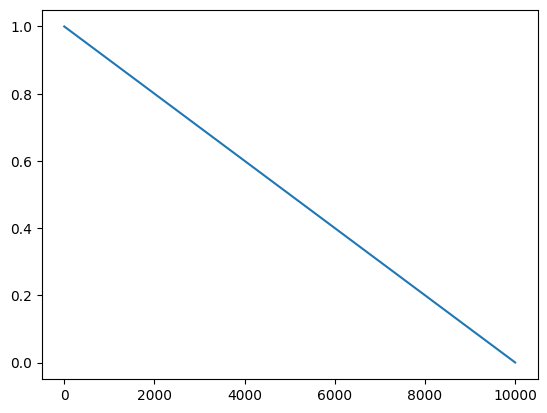

In [89]:
TOTAL_STEPS = 10000
TOTAL_DECAY_TARGET_STEP = 10000
INIT_EPSILON = 1
MIN_EPSILON = 0
IS_PLATEAU_AT_MIN = True

linear_decay_exc = [linear_decay(MIN_EPSILON, i, TOTAL_DECAY_TARGET_STEP, INIT_EPSILON, IS_PLATEAU_AT_MIN) for i in range(TOTAL_STEPS)]

plt.plot(range(TOTAL_STEPS), linear_decay_exc, label="linear")

In [90]:
print("DEFAULT ENVIROMENT")
result_epsilon_linear_decay = run_decaying_epsilon_greedy(env=env, total_steps=STEPS, totally_decayed_target_step=STEPS, decay_function=linear_decay)
print(f'Epsilon-greedy-linear-decay (totally_decayed_target_step: 100%) - soma das recompensas: ', sum(result_epsilon_linear_decay[0]))

result_epsilon_linear_decay = run_decaying_epsilon_greedy(env=env, total_steps=STEPS, totally_decayed_target_step=STEPS*0.95, decay_function=linear_decay)
print(f'Epsilon-greedy-linear-decay (totally_decayed_target_step: 95%) - soma das recompensas: ', sum(result_epsilon_linear_decay[0]))

result_epsilon_linear_decay = run_decaying_epsilon_greedy(env=env, total_steps=STEPS, totally_decayed_target_step=STEPS*0.75, decay_function=linear_decay)
print(f'Epsilon-greedy-linear-decay (totally_decayed_target_step: 75%) - soma das recompensas: ', sum(result_epsilon_linear_decay[0]))


print("------------------------------------------------")
print("GAUSSIAN ENVIROMENT")
result_epsilon_linear_decay = run_decaying_epsilon_greedy(env=env_gauss, total_steps=STEPS, totally_decayed_target_step=STEPS, decay_function=linear_decay)
print(f'Epsilon-greedy-linear-decay (totally_decayed_target_step: 100%) - soma das recompensas: ', sum(result_epsilon_linear_decay[0]))

result_epsilon_linear_decay = run_decaying_epsilon_greedy(env=env_gauss, total_steps=STEPS, totally_decayed_target_step=STEPS*0.95, decay_function=linear_decay)
print(f'Epsilon-greedy-linear-decay (totally_decayed_target_step: 95%) - soma das recompensas: ', sum(result_epsilon_linear_decay[0]))

result_epsilon_linear_decay = run_decaying_epsilon_greedy(env=env_gauss, total_steps=STEPS, totally_decayed_target_step=STEPS*0.75, decay_function=linear_decay)
print(f'Epsilon-greedy-linear-decay (totally_decayed_target_step: 75%) - soma das recompensas: ', sum(result_epsilon_linear_decay[0]))


DEFAULT ENVIROMENT
Epsilon-greedy-linear-decay (totally_decayed_target_step: 100%) - soma das recompensas:  6186.0
Epsilon-greedy-linear-decay (totally_decayed_target_step: 95%) - soma das recompensas:  6159.0
Epsilon-greedy-linear-decay (totally_decayed_target_step: 75%) - soma das recompensas:  6563.0
------------------------------------------------
GAUSSIAN ENVIROMENT
Epsilon-greedy-linear-decay (totally_decayed_target_step: 100%) - soma das recompensas:  5212.03799343772
Epsilon-greedy-linear-decay (totally_decayed_target_step: 95%) - soma das recompensas:  5109.2616529212555
Epsilon-greedy-linear-decay (totally_decayed_target_step: 75%) - soma das recompensas:  5343.848189148054


In [91]:
result_epsilon_linear_decay = repeated_exec(RUNS, "LINEARLY DECAYED EPSILON", run_decaying_epsilon_greedy, env, STEPS, STEPS, linear_decay)
algorithm_name, rewards = result_epsilon_linear_decay

print("Summary for Linearly Decayed Epsilon Greedy")
print(" - total reward:", rewards.sum())
print(" - avg reward (win rate):", rewards.sum() / STEPS)

Executing <function run_decaying_epsilon_greedy at 0x7f2d9de1d3f0>:


100%|██████████| 75/75 [00:05<00:00, 12.84it/s]

  (75 executions of LINEARLY DECAYED EPSILON finished in 5.85 secs)
Summary for Linearly Decayed Epsilon Greedy
 - total reward: 462315.0
 - avg reward (win rate): 46.2315


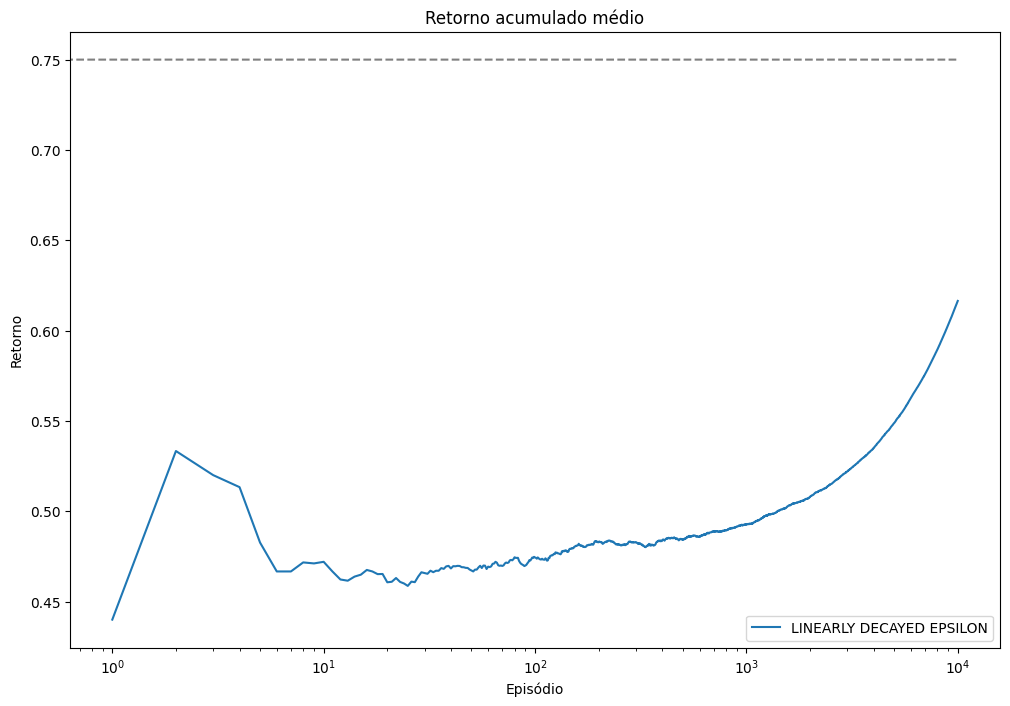

In [92]:
plot_multiple_results([result_epsilon_linear_decay], cumulative=True, x_log_scale=True, yreference=env.get_max_mean_reward())

## Exponential Decay

In [93]:
def exponential_decay(min_epsilon, current_step, target_step, initial_epsilon=1, plateau_at_min=True):
  decay_rate = (1 / (target_step)) * np.log(1 / (min_epsilon + 0.0000001))

  epsilon = math.e ** (-decay_rate * current_step)

  if plateau_at_min and epsilon <= (min_epsilon + 0.0000001):
    return min_epsilon

  return epsilon

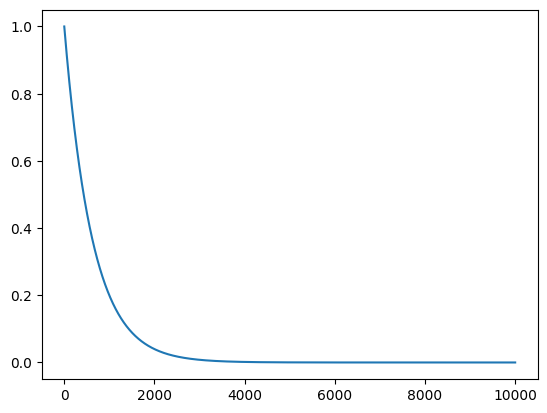

In [94]:
TOTAL_STEPS = 10000
TOTAL_DECAY_TARGET_STEP = 10000
INIT_EPSILON = 1
MIN_EPSILON = 0
IS_PLATEAU_AT_MIN = True

linear_decay_exc = [exponential_decay(MIN_EPSILON, i, TOTAL_DECAY_TARGET_STEP, INIT_EPSILON, IS_PLATEAU_AT_MIN) for i in range(TOTAL_STEPS)]

plt.plot(range(TOTAL_STEPS), linear_decay_exc, label="exponential")

In [95]:
print("DEFAULT ENVIROMENT")
result_epsilon_exp_decay = run_decaying_epsilon_greedy(env=env, total_steps=STEPS, totally_decayed_target_step=STEPS, decay_function=exponential_decay)
print(f'Epsilon-greedy-exp-decay - soma das recompensas: ', sum(result_epsilon_exp_decay[0]))

print("------------------------------------------------")
print("GAUSSIAN ENVIROMENT")
result_epsilon_exp_decay = run_decaying_epsilon_greedy(env=env_gauss, total_steps=STEPS, totally_decayed_target_step=STEPS, decay_function=exponential_decay)
print(f'Epsilon-greedy-exp-decay - soma das recompensas: ', sum(result_epsilon_exp_decay[0]))

DEFAULT ENVIROMENT
Epsilon-greedy-exp-decay - soma das recompensas:  7377.0
------------------------------------------------
GAUSSIAN ENVIROMENT
Epsilon-greedy-exp-decay - soma das recompensas:  5262.163063487787


In [96]:
result_epsilon_exp_decay = repeated_exec(RUNS, "EXPONENTIALLY DECAYED EPSILON", run_decaying_epsilon_greedy, env, STEPS, STEPS, exponential_decay)
algorithm_name, rewards = result_epsilon_exp_decay

print("Summary for Exponentially Decayed Epsilon Greedy")
print(" - total reward:", rewards.sum())
print(" - avg reward (win rate):", rewards.sum() / STEPS)

Executing <function run_decaying_epsilon_greedy at 0x7f2d9de1d3f0>:


100%|██████████| 75/75 [00:09<00:00,  7.62it/s]


  (75 executions of EXPONENTIALLY DECAYED EPSILON finished in 9.85 secs)
Summary for Exponentially Decayed Epsilon Greedy
 - total reward: 550143.0
 - avg reward (win rate): 55.0143


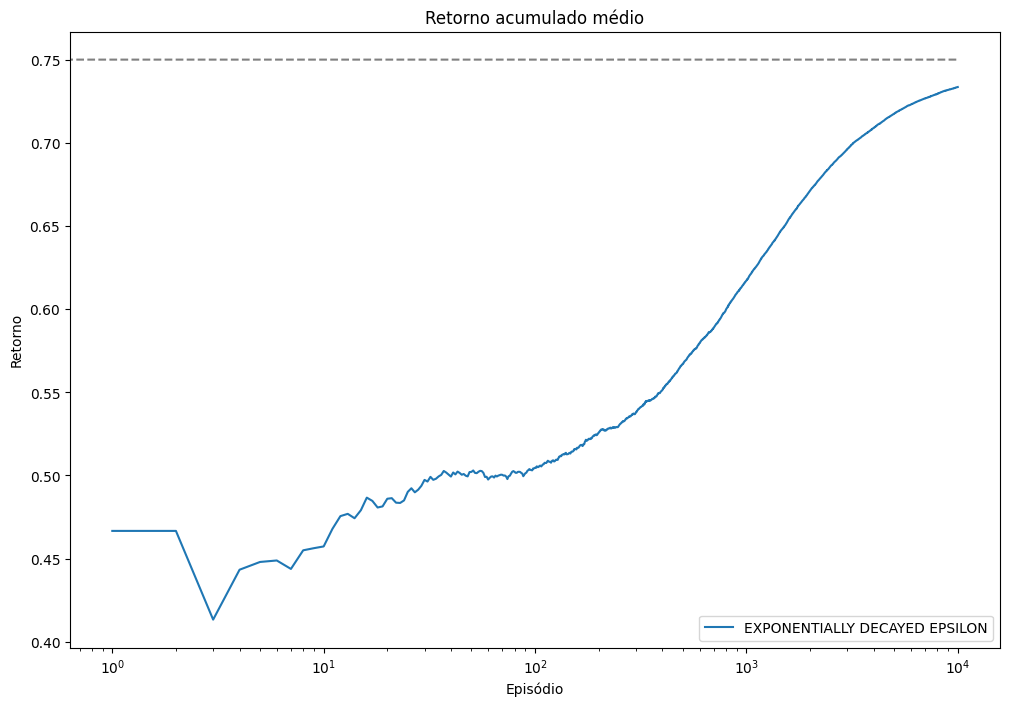

In [97]:
plot_multiple_results([result_epsilon_exp_decay], cumulative=True, x_log_scale=True, yreference=env.get_max_mean_reward())

## Comparing

### Linearly vs Exponentially decayed

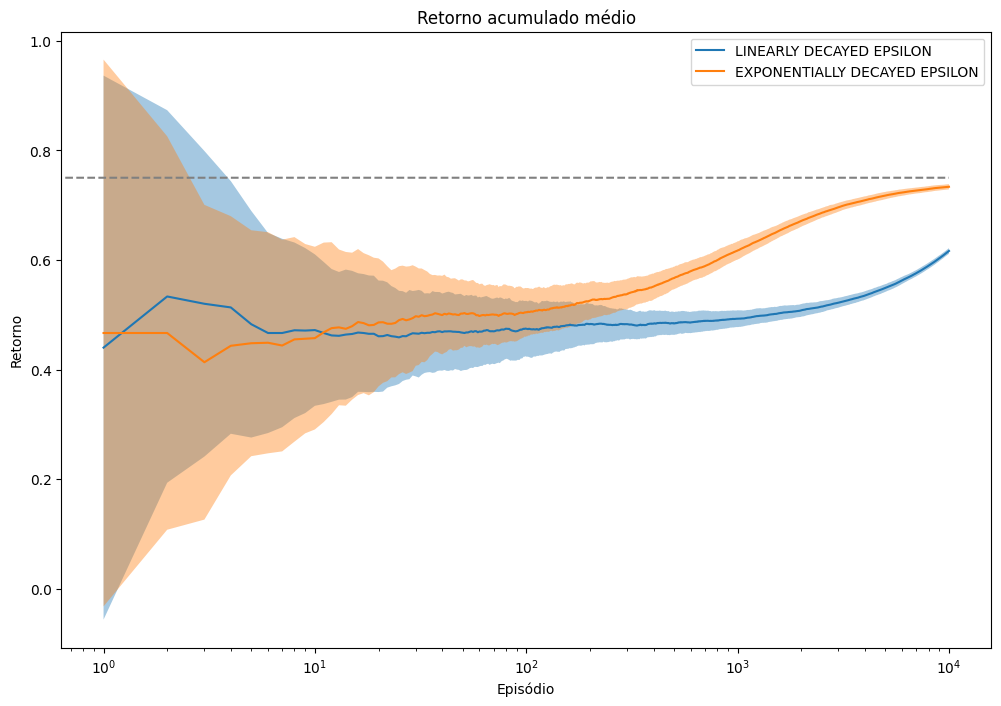

In [98]:
plot_multiple_results([result_epsilon_linear_decay, result_epsilon_exp_decay], cumulative=True, x_log_scale=True, yreference=env.get_max_mean_reward(), plot_stddev=True)

### All Algorithms

Executing <function run_random at 0x7f2d9dde1f30>:


100%|██████████| 75/75 [00:13<00:00,  5.65it/s]


  (75 executions of RANDOM finished in 13.27 secs)
Executing <function run_epsilon_greedy at 0x7f2d9c123c70>:


100%|██████████| 75/75 [00:06<00:00, 11.39it/s]


  (75 executions of EPS(0.02)-GREEDY finished in 6.60 secs)
Executing <function run_epsilon_greedy at 0x7f2d9c123c70>:


100%|██████████| 75/75 [00:05<00:00, 13.50it/s]


  (75 executions of EPS(0.1)-GREEDY finished in 5.57 secs)
Executing <function run_epsilon_greedy at 0x7f2d9c123c70>:


100%|██████████| 75/75 [00:06<00:00, 11.22it/s]


  (75 executions of EPS(0.3)-GREEDY finished in 6.69 secs)


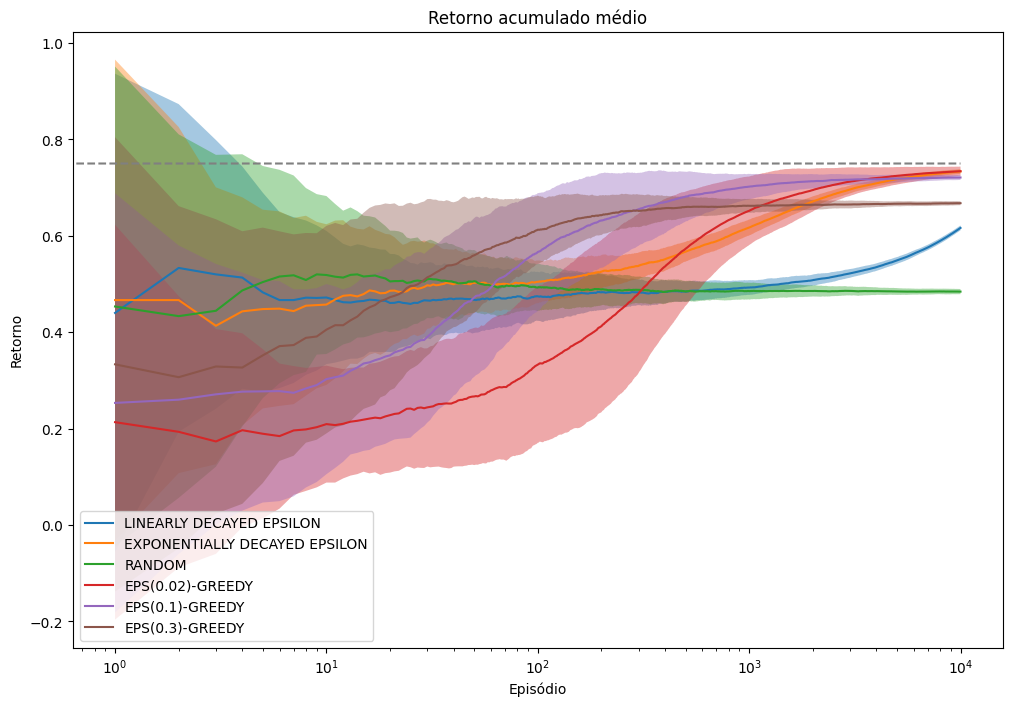

In [104]:
results = [result_epsilon_linear_decay, result_epsilon_exp_decay]

results.append( repeated_exec(RUNS, "RANDOM", run_random, env, STEPS) )

for epsilon in [0.02, 0.10, 0.30]:
    results.append( repeated_exec(RUNS, f"EPS({epsilon})-GREEDY", run_epsilon_greedy, env, STEPS, epsilon) )

plot_multiple_results(results, cumulative=True, x_log_scale=True, yreference=env.get_max_mean_reward(), plot_stddev=True)